In [1]:
from utility import *
import warnings
warnings.filterwarnings('ignore') 

In [2]:
import pandas as pd 
import numpy as np

train = pd.read_csv('datasets\\sds\\train_04.csv')
test = pd.read_csv('datasets\\sds\\test_04.csv')
train.head()
print(train.iloc[3]['text'])

Email von einer Kollegin. Gestern, gemeinsam mit Freunden beim Grillen. Aufstehen und beginnen zu arbeiten. Alles funktioniert und es macht Spaß. Veränderung des Verhaltens der Menschen durch die Pandemie. Aufgaben verteilen. lustig, ungezwungen


In [3]:
y_train = np.where(train.neuro_bin.values == 1, 1, 0)
y_test = np.where(test.neuro_bin.values == 1, 1, 0)
print(y_train)
#Best Parameters : {'alpha': 1, 'l1_ratio': 0.15, 'penalty': 'l2'}

[1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1
 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0]


In [4]:
from featurization_pymagnitude_xlmr_sentiment import *

print("\n\n---- Getting pymagnitude embeddings with xlmr sentiment model ----")
train_features_pm_xlmr, test_features_pm_xlmr, feature_names_pm_xlmr = featurization_pymagnitude_xlmr_sentiment(train, test, 'tfidf_glove')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!




---- Getting pymagnitude embeddings with xlmr sentiment model ----
Emoji re....
Num dots....
Punctuation....
Sentiment Scores....
XLMR Sentiment Model took --- 19.8404860496521 seconds ---
Text Features....
Pymagnitude.....
Pymagnitude model load took --- 0.002481222152709961 seconds ---


  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

Pymagnitude Framework took --- 29.26844835281372 seconds ---
--- Normalized-features:
[[0.62882921 0.57895593 0.49701685 ... 0.54537616 0.57900959 0.38768693]
 [0.50755797 0.20770079 0.6208735  ... 0.37141341 0.57197655 0.36902082]
 [0.52357246 0.71562488 0.56267328 ... 0.64947906 0.71248297 0.10302208]
 ...
 [0.         0.59411483 0.57789967 ... 0.         0.97384943 0.24835512]
 [0.41829611 0.58404286 0.24840145 ... 0.49984046 0.31019643 0.        ]
 [0.5869989  0.42290812 0.64402693 ... 0.58942267 0.54180446 0.56389707]]
DONE!


### SFS (Sequential Forward Selection)
Load model

In [5]:
import joblib

sf_selector_path = "../../pipeline/models/feature_selectors/neuroticism_sf_selector2.joblib"
sf_selector = joblib.load(sf_selector_path)

train_features_selected = sf_selector.transform(train_features_pm_xlmr.tocsr())
test_features_selected = sf_selector.transform(test_features_pm_xlmr.tocsr())

Leave One Out Cross Validation (LOOCV)

In [ ]:
def loo_cv()

## Pymagnitude with xlmr sentiment

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 309 out of 309 | elapsed:    2.7s finished
Features: 1/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 308 out of 308 | elapsed:    0.2s finished
Features: 2/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 307 out of 307 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished
Features: 3/309[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: D

  (0, 1)	0.4565093934594118
  (0, 2)	0.4599432647892081
  (0, 3)	0.4532032777515212
  (0, 4)	0.43094779971269115
  (0, 5)	0.4650376174816311
  (0, 6)	0.7429040817198183
  (0, 7)	0.3832407762437786
  (0, 8)	0.36670371672429797
  (0, 9)	0.39308043633377254
  (1, 0)	0.5
  (1, 1)	0.11352239826890773
  (1, 2)	0.45905946701774347
  (1, 3)	0.35969263231435505
  (1, 4)	0.5197561321991362
  (1, 5)	0.40033408391665337
  (1, 6)	0.8875170078573775
  (1, 7)	0.32960622093964465
  (1, 8)	0.5176556349516453
  (1, 9)	0.26249184431217354
  (2, 1)	0.3090744668655771
  (2, 2)	0.2072717622168842
  (2, 3)	0.41437245092924474
  (2, 4)	0.20105225041925023
  (2, 5)	0.22796851002897148
  (2, 6)	0.6605937394310913
  :	:
  (53, 4)	0.5663960086561215
  (53, 5)	0.2560199749324268
  (53, 6)	0.5075339503163621
  (53, 7)	0.5854588391098048
  (53, 8)	0.5530303848673019
  (53, 9)	0.5475976003274657
  (54, 1)	0.16171256346646726
  (54, 2)	0.43009433518603096
  (54, 3)	0.5221424924156473
  (54, 4)	0.41196207812135
  (54, 

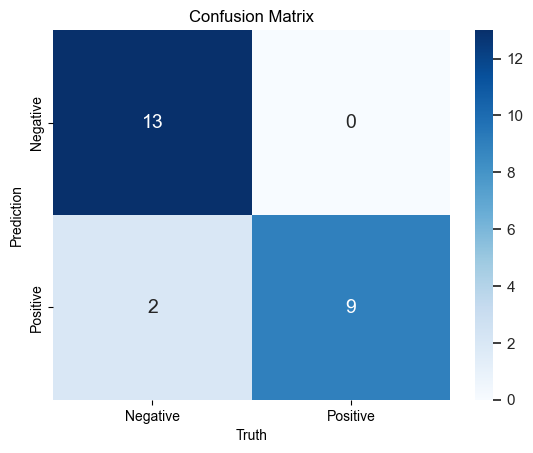

In [6]:
selector, logreg = run_sf_selection(train_features_pm_xlmr, test_features_pm_xlmr, y_train, y_test, feature_names_pm_xlmr)

Superb! We have the best accuracy with the fastest embedding model and the fastest sentiment model!!

## Save best classifier model

In [7]:
import joblib
selector_file = 'neuroticism_sf_selector2.joblib'
log_reg_file = 'neuroticism_classifier2.joblib'
joblib.dump(selector, selector_file)
joblib.dump(logreg, log_reg_file)


['neuroticism_classifier2.joblib']